<a href="https://colab.research.google.com/github/qassi2008/Diabetes-Patient-/blob/main/Diabetes_130_US.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**We start by importing needed libraries**

In [ ]:
import IPython
import pandas as pd
import numpy as np
from statistics import mode
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,recall_score,mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

warnings.filterwarnings('ignore')

#**EDA**

**Load & Unzip the Dataset**

In [ ]:
!unzip /content/diabetes_dataset.zip -d /content/unzipped_content/

Archive:  /content/diabetes_dataset.zip
  inflating: /content/unzipped_content/diabetic_data.csv  
  inflating: /content/unzipped_content/IDS_mapping.csv  


In [ ]:
# Extracte csv files
df = pd.read_csv('/content/unzipped_content/diabetic_data.csv')
# take a look at dataset
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# **Variable Description**


**Encounter ID:** Unique identifier of an encounter

**Patient number:** Unique identifier of a patient

**Race Values:** Caucasian, Asian, African American, Hispanic, and other

**Gender Values:** male, female, and unknown/invalid

**Age:** Grouped in 10-year intervals: (0, 10), (10, 20), …, (90, 100)

**Weight:** Weight in pounds

**Admission type:** Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available

**Discharge disposition:** Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available

**Admission source:** Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital

**Time in hospital:** Integer number of days between admission and discharge

**Payer code:** Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical

**Medical specialty:** Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon

**Number of lab procedures:** Number of lab tests performed during the encounter

**Number of procedures:** Numeric Number of procedures (other than lab tests) performed during the encounter

**Number of medications:** Number of distinct generic names administered during the encounter

**Number of outpatient visits:** Number of outpatient visits of the patient in the year preceding the encounter

**Number of emergency visits:** Number of emergency visits of the patient in the year preceding the encounter

**Number of inpatient visits:** Number of inpatient visits of the patient in the year preceding the encounter

**Diagnosis 1:** The primary diagnosis (coded as first three digits of ICD9); 848 distinct values

**Diagnosis 2:** Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values

**Diagnosis 3:** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values

**Number of diagnoses:** Number of diagnoses entered to the system 0%

**Glucose serum test:** result Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured

**A1c test result:** Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

**Change of medications:** Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”

**Diabetes medications:** Indicates if there was any diabetic medication prescribed. Values: “yes” and “no” 24 features for medications For the generic names: **metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone,** the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

**Readmitted:** Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

In [ ]:
# check the dimention of the data
df.shape

(101766, 50)

In [ ]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
# Print a statement about the total number of columns in the dataset
print('According to the data, there are a total of 50 columns')
# Select only the categorical columns from the dataframe
data_cat = df.select_dtypes(include=object)
# Select only the numerical columns from the dataframe
data_num = df.select_dtypes(include=np.number)
# Print the total number of categorical columns found
print('Total categorical columns:', len(data_cat.columns))
print('\n')
# Print the names of the categorical columns
print('Categorical column names :', data_cat.columns)
print('\n')
# Print the total number of numerical columns found
print('Total numerical columns :', len(data_num.columns))
print('\n')
# Print the names of the numerical columns
print('Numerical column names :', data_num.columns)

According to the data, there are a total of 50 columns
Total categorical columns: 37


Categorical column names : Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


Total numerical columns : 13


Numerical column names : Index(['encounter_id', 'patient_nbr', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num

#**Feature Engineering**

In [ ]:
# check if the dataset contain missing values or not
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [ ]:
# Total number of missing values in the dataset
total_missing = df.isnull().sum().sum()
print(f"Total number of missing values: {total_missing}")


Total number of missing values: 181168


In [ ]:
# Iterate over each column in the DataFrame 'df'
for i in df.columns:
    # Check if the current column's data type is 'object' (categorical or string)
    if df[i].dtype == object:
        # Count and print the number of entries in the current column that are equal to '?'
        print(i, df[i][df[i] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [ ]:
# Check for missing values ('?' represents missing values)
missing_values = df.replace('?', pd.NA).isnull().sum()
print(missing_values)

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [ ]:
# check the data in precentage
for i in df.columns:
  print(i,df[i][df[i] == '?'].count()/len(df)*100)

encounter_id 0.0
patient_nbr 0.0
race 2.2335554114340743
gender 0.0
age 0.0
weight 96.85847925633315
admission_type_id 0.0
discharge_disposition_id 0.0
admission_source_id 0.0
time_in_hospital 0.0
payer_code 39.5574160328597
medical_specialty 49.08220820313268
num_lab_procedures 0.0
num_procedures 0.0
num_medications 0.0
number_outpatient 0.0
number_emergency 0.0
number_inpatient 0.0
diag_1 0.02063557573256294
diag_2 0.3517874339170253
diag_3 1.398305917497003
number_diagnoses 0.0
max_glu_serum 0.0
A1Cresult 0.0
metformin 0.0
repaglinide 0.0
nateglinide 0.0
chlorpropamide 0.0
glimepiride 0.0
acetohexamide 0.0
glipizide 0.0
glyburide 0.0
tolbutamide 0.0
pioglitazone 0.0
rosiglitazone 0.0
acarbose 0.0
miglitol 0.0
troglitazone 0.0
tolazamide 0.0
examide 0.0
citoglipton 0.0
insulin 0.0
glyburide-metformin 0.0
glipizide-metformin 0.0
glimepiride-pioglitazone 0.0
metformin-rosiglitazone 0.0
metformin-pioglitazone 0.0
change 0.0
diabetesMed 0.0
readmitted 0.0


- In the dataset the missing values are represented as ‘?’
- Weight has 96.85% of the missing values so that there is no significance to fill those missing values, we decided to drop this variable
- Payer_code has 39.55% missing values that means we can drop this column
- medical_specialty has 49.08 missing values that means we can drop this columns too


In [ ]:
# Drop the 'weight', 'payer_code', and 'medical_specialty' columns from the DataFrame
df = df.drop(['weight', 'payer_code', 'medical_specialty'], axis=1)

In [ ]:
# Displaying statistical overview of tha dataset after droping the missing values
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [ ]:
# the number of unique values in the 'encounter_id' column of the DataFrame
df['encounter_id'].nunique()

101766

- The patients that have come to the hospital have been provided with different unique encounter_id so that’s why there are 101766 values

In [ ]:
# the number of unique values in the patient_nbr column of the DataFrame
df['patient_nbr'].nunique()

71518

- There are 71518 unique patiens that have entered the system
- encounter_id and patient_nbr these are just to identifiers and not useful variables, they can be dropped for future analysis


In [ ]:
# Droping not usefull variables the 'encounter_id' and 'patient_nbr' columns from the DataFrame
df.drop(['encounter_id','patient_nbr'], axis=1,inplace=True)

In [ ]:
# Check the value in the 'race'
df['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

- There are unknown values in the output with the sign ‘?’ Which we can replace with NaN value so that this can be filled


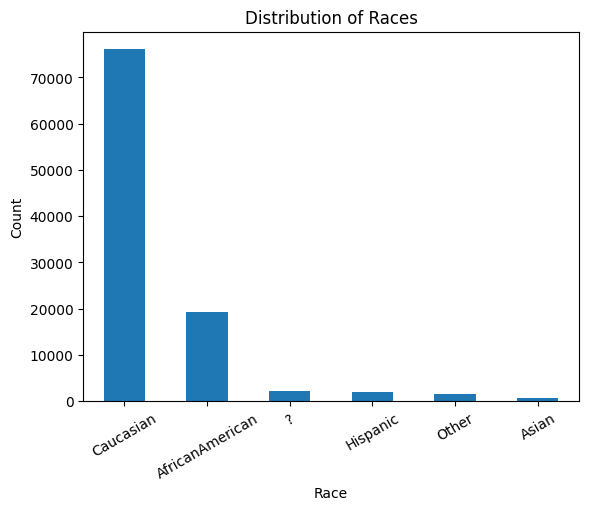

In [ ]:
import matplotlib.pyplot as plt

# Calculate value counts for the 'race' column
race_counts = df['race'].value_counts()

# Create a bar plot
race_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.title('Distribution of Races')

# Show the plot
plt.show()


In [ ]:
# Replace '?' values with NaN (Not a Number) in the 'race'
df['race'] = df['race'].replace('?',np.nan)

In [ ]:
# check after replacing nan with '?'
df['race'].unique()

array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [ ]:
# Fill missing values in the 'race' with the most frequent value (mode) of that column
df['race'] = df['race'].fillna(df['race'].mode()[0])

In [ ]:
# Check the value in the 'race' after filling
df['race'].value_counts()

race
Caucasian          78372
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

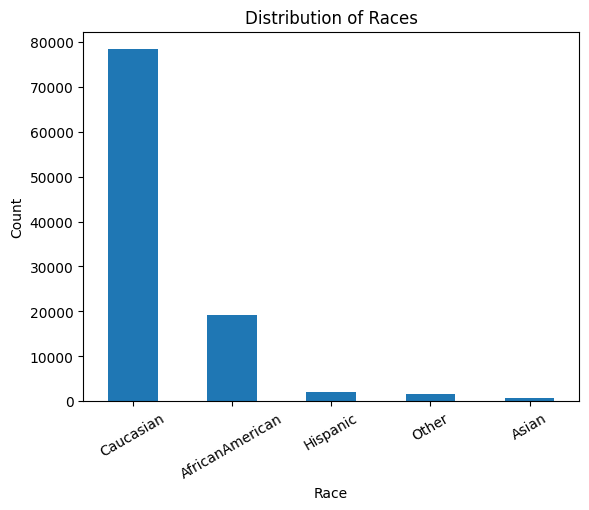

In [ ]:
import matplotlib.pyplot as plt

# Calculate value counts for the 'race' column
race_counts = df['race'].value_counts()

# Create a bar plot
race_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.title('Distribution of Races')

# Show the plot
plt.show()


In [ ]:
# Check the gender
df['gender'].value_counts()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

- There is 3rd category which is unknown/invalid has missing values as there count is less so the can be dropped

In [ ]:
# Replace 'Unknown/Invalid' values with NaN in the 'gender'
# And Remove all rows from 'df' where the 'gender' column has NaN values
df['gender'] = df['gender'].replace('Unknown/Invalid',np.nan)
df['gender'].dropna(inplace=True)

In [ ]:
# Output after replacing with nan
df['gender'].unique()

array(['Female', 'Male', nan], dtype=object)

In [ ]:
# Fill missing values in the 'gender' with mode
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

In [ ]:
# check the data after filling with mode
df['gender'].value_counts()

gender
Female    54711
Male      47055
Name: count, dtype: int64

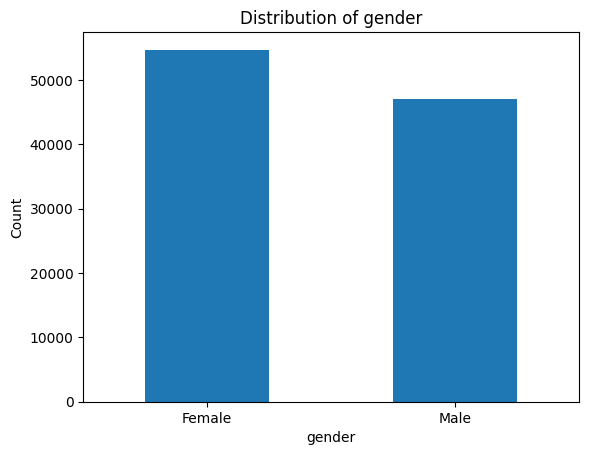

In [ ]:
import matplotlib.pyplot as plt

# Calculate value counts for the 'race' column
race_counts = df['gender'].value_counts()

# Create a bar plot
race_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Distribution of gender')

# Show the plot
plt.show()

In [ ]:
# Replace all '?' values with NaN across the entire DataFrame
df.replace('?',np.nan,inplace=True)

In [ ]:
# The number of missing values in each column of the DataFrame
df.isnull().sum()

race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone 

In [ ]:
# Check the data with value of age range
df['age'].value_counts()

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

- the age renge is betwwen 0 to 100
most of the population come under 50 to 100

- The dataset gives us only age as 10 year interval, we do not know the exact ag of eack patient
- Wenassume that age of the patient on average lies at the midpoint of the age category for example if the patient's age category is 40 to 50 years, we assume the age is 45 years so we converted age categories to midpoints

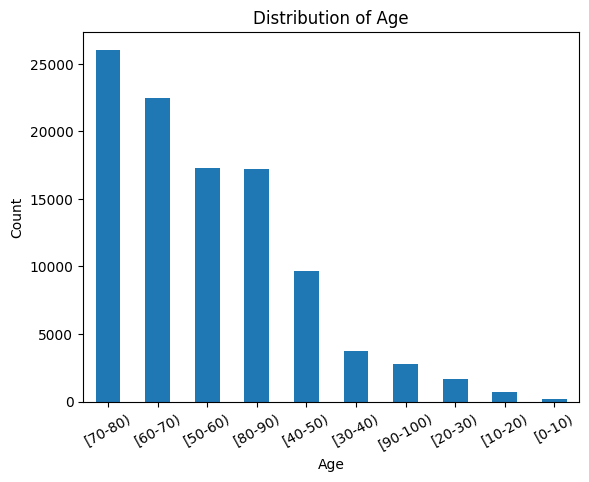

In [ ]:
import matplotlib.pyplot as plt

# Calculate value counts for the 'race' column
race_counts = df['age'].value_counts()

# Create a bar plot
race_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=29)
plt.title('Distribution of Age')

# Show the plot
plt.show()

In [ ]:
# List unique values in the 'age'
df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [ ]:
# Replace age range strings with their corresponding median values in the 'age'
df['age' ]= df['age'].replace({'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35 , '[40-50)':45,
                                    '[50-60)':55,'[60-70)':65, '[70-80)':75, '[80-90)':85, '[90-100)':95,})

In [ ]:
# check the data after converting age range
df['age'].value_counts()

age
75    26068
65    22483
55    17256
85    17197
45     9685
35     3775
95     2793
25     1657
15      691
5       161
Name: count, dtype: int64

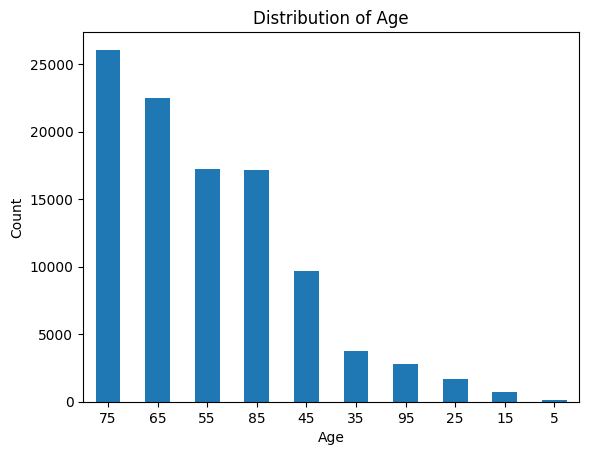

In [ ]:
import matplotlib.pyplot as plt

# Calculate value counts for the 'race' column
race_counts = df['age'].value_counts()

# Create a bar plot
race_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Distribution of Age')

# Show the plot
plt.show()

In [ ]:
# Check each unique value in the 'admission_type_id'
df['admission_type_id'].value_counts()

admission_type_id
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64

In [ ]:
# Read the CSV file
ID_map = pd.read_csv('/content/unzipped_content/IDS_mapping.csv')

# Display the 8 rows of the 'admission_type_id' and 'description' columns
ID_map.loc[:, ['admission_type_id', 'description']].head(8)


,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [ ]:
# Map numeric admission type IDs to descriptive categories in the 'admission_type_id' column of
df['admission_type_id'] = df['admission_type_id'].replace({1: 'Emergency',2:'Emergency',3:'Elective',4:'Newborn',
                                                               5:'Not Available',6:'Not Available', 7:'Emergency',8: 'Not Available'})

In [ ]:
# Check each unique value in the 'admission_type_id'
df['admission_type_id'].value_counts()

admission_type_id
Emergency        72491
Elective         18869
Not Available    10396
Newborn             10
Name: count, dtype: int64

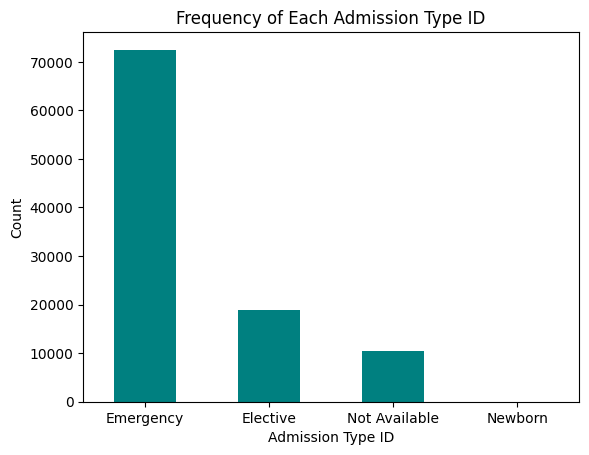

In [ ]:
import matplotlib.pyplot as plt

# Calculate value counts for the 'admission_type_id' column
admission_type_counts = df['admission_type_id'].value_counts()

# Create a bar plot
admission_type_counts.plot(kind='bar', color='teal')  # You can choose any color you like

# Add labels and title
plt.xlabel('Admission Type ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Frequency of Each Admission Type ID')

# Show the plot
plt.show()


In [ ]:
# Filter and return rows from the DataFrame 'df' where the 'admission_type_id' column equals 'Newborn'
df[df.loc[:,'admission_type_id'] == 'Newborn']

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
2043,Caucasian,Male,55,Newborn,1,4,2,56,2,13,...,No,Steady,No,No,No,No,No,No,Yes,NO
2203,Caucasian,Male,85,Newborn,1,4,2,46,6,14,...,No,Steady,No,No,No,No,No,No,Yes,>30
2461,AfricanAmerican,Male,75,Newborn,6,4,5,73,1,12,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4823,Caucasian,Female,65,Newborn,6,4,2,39,0,7,...,No,Steady,No,No,No,No,No,No,Yes,<30
35877,AfricanAmerican,Male,65,Newborn,1,14,3,66,0,18,...,No,Steady,No,No,No,No,No,No,Yes,NO
47548,Hispanic,Male,45,Newborn,1,7,6,39,4,7,...,No,No,No,No,No,No,No,No,No,NO
48711,Caucasian,Female,75,Newborn,6,1,4,37,1,18,...,No,No,No,No,No,No,No,Ch,Yes,>30
80354,Hispanic,Female,5,Newborn,1,1,2,27,0,2,...,No,No,No,No,No,No,No,No,No,NO
87714,Caucasian,Male,65,Newborn,1,4,3,28,0,15,...,No,Steady,Steady,No,No,No,No,Ch,Yes,NO
100721,Asian,Male,85,Newborn,6,7,3,51,0,10,...,No,No,No,No,No,No,No,No,Yes,NO


In [ ]:
# Remove rows from the DataFrame where the 'admission_type_id' column equals 'Newborn'
df.drop(df.index[df['admission_type_id'] == 'Newborn'], inplace = True)

In [ ]:
# Check each unique value in the 'admission_type_id' after removing newborn
df['admission_type_id'].value_counts()

admission_type_id
Emergency        72491
Elective         18869
Not Available    10396
Name: count, dtype: int64

In [ ]:
# Check each unique value in the 'discharge_disposition_id'
df['discharge_disposition_id'].value_counts()

discharge_disposition_id
1     60228
3     13954
6     12898
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: int64

In [ ]:
# List unique values in the 'discharge_disposition_id'
df['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

In [ ]:
# Splitting the ID_map into two separate DataFrames
admission_type_map = ID_map.iloc[:8].reset_index(drop=True)
discharge_disposition_map = ID_map.iloc[30:].reset_index(drop=True)

# Display the first 30 rows of each mapping separately if needed
print("Admission Type Mapping:")
print(admission_type_map.head(8))

print("\nDischarge Disposition Mapping:")
print(discharge_disposition_map.head(30))


Admission Type Mapping:
  admission_type_id    description
0                 1      Emergency
1                 2         Urgent
2                 3       Elective
3                 4        Newborn
4                 5  Not Available
5                 6            NaN
6                 7  Trauma Center
7                 8     Not Mapped

Discharge Disposition Mapping:
      admission_type_id                                        description
0                    21    Expired, place unknown. Medicaid only, hospice.
1                    22  Discharged/transferred to another rehab fac in...
2                    23  Discharged/transferred to a long term care hos...
3                    24  Discharged/transferred to a nursing facility c...
4                    25                                         Not Mapped
5                    26                                    Unknown/Invalid
6                    30  Discharged/transferred to another Type of Heal...
7                    27  Disc

In [ ]:
# Map numeric discharge disposition IDs to descriptive categories in the 'discharge_disposition_id'
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace({1:'Discharged to home',
                                                                             6:'Discharged to home',
                                                                             8:'Discharged to home',
                                                                             2:'Transferred to another facility',
                                                                             3:'Transferred to another facility',
                                                                             4:'Transferred to another facility',
                                                                             5:'Transferred to another facility',
                                                                             16:'Transferred to another facility',
                                                                             22:'Transferred to another facility',
                                                                             23:'Transferred to another facility',
                                                                             24:'Transferred to another facility',
                                                                             27:'Transferred to another facility',
                                                                             28:'Transferred to another facility',
                                                                             29:'Transferred to another facility',
                                                                             30:'Transferred to another facility',
                                                                             7:'Left AMA',
                                                                             9:'Still patient/referred to this institution',
                                                                             12:'Still patient/referred to this institution',
                                                                             15:'Still patient/referred to this institution',
                                                                             17:'Still patient/referred to this institution',
                                                                             10:'Neonate discharged',
                                                                             11:'Expired',
                                                                             19:'Expired',
                                                                             20:'Expired',
                                                                             21:'Expired',
                                                                             13:'Hospice',
                                                                             14:'Hospice',
                                                                             18:'Not Available',
                                                                             25:'Not Available',
                                                                             26:'Not Available'})

In [ ]:
# Check each unique value in the 'discharge_disposition_id'
df['discharge_disposition_id'].value_counts()

discharge_disposition_id
Discharged to home                            73234
Transferred to another facility               20689
Not Available                                  4680
Expired                                        1652
Hospice                                         771
Left AMA                                        623
Still patient/referred to this institution      101
Neonate discharged                                6
Name: count, dtype: int64

In [ ]:
# The patient who have expired and newnate(newborn child) should be removed from the column because they will create bias as they will not be readmitted
df = df[df['discharge_disposition_id']!= 'Expired']
df = df[df['discharge_disposition_id']!= 'Neonate discharged']
df = df[df['discharge_disposition_id']!= 'Hospice']

In [ ]:
# check tha data after removing
df['discharge_disposition_id'].value_counts()

discharge_disposition_id
Discharged to home                            73234
Transferred to another facility               20689
Not Available                                  4680
Left AMA                                        623
Still patient/referred to this institution      101
Name: count, dtype: int64

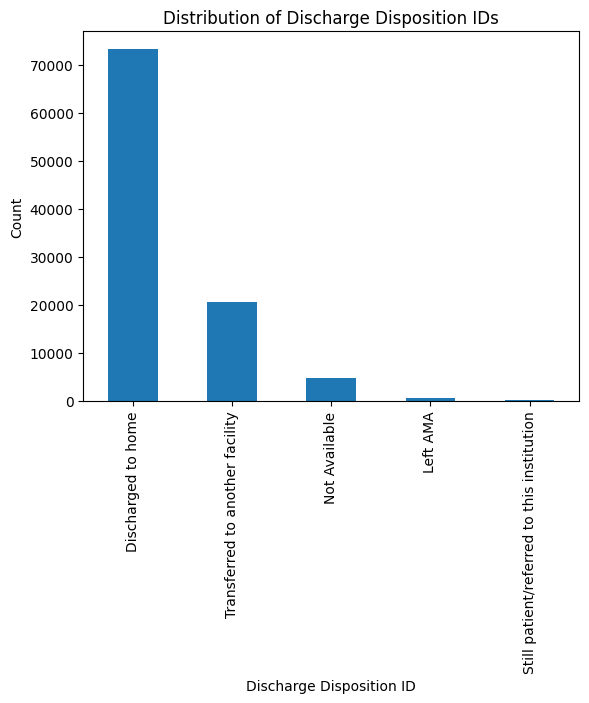

In [ ]:
import matplotlib.pyplot as plt

# Calculate value counts for the 'discharge_disposition_id' column
discharge_disposition_counts = df['discharge_disposition_id'].value_counts()

# Create a bar plot
discharge_disposition_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Discharge Disposition ID')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Distribution of Discharge Disposition IDs')

# Show the plot
plt.show()


In [ ]:

import pandas as pd

# Define the ICD-9-CM mapping as a dictionary
icd9_mapping = {
    'Diagnosis Code': [
        '[140, 240)', '250.x',
        '[390, 460) and 785', '[460, 520) and 786',
        '[520, 580) and 787', '[800, 1000)',
        '[700, 740)', '[580, 630) and 788',
        'V, E and others'
    ],
    'Diseases': [
        'Neoplasms', 'Diabetes',
        'Circulatory', 'Respiratory',
        'Digestive', 'Injury',
        'Musculoskeletal', 'Genitourinary',
        'Other diseases'
    ]
}

# Convert the dictionary to a DataFrame
icd9_df = pd.DataFrame(icd9_mapping)

# Print the DataFrame
print(icd9_df)


       Diagnosis Code         Diseases
0          [140, 240)        Neoplasms
1               250.x         Diabetes
2  [390, 460) and 785      Circulatory
3  [460, 520) and 786      Respiratory
4  [520, 580) and 787        Digestive
5         [800, 1000)           Injury
6          [700, 740)  Musculoskeletal
7  [580, 630) and 788    Genitourinary
8     V, E and others   Other diseases


In [ ]:
# Map numeric admission source IDs to descriptive categories in the 'admission_source_id'
df['admission_source_id'] = df['admission_source_id'].replace({1:'Referral',
                                                                  2:'Referral',
                                                                  3:'Referral',
                                                                  4:'Transferred from hospital',
                                                                  5:'Transferred from hospital',
                                                                  6:'Transferred from hospital',
                                                                  10:'Transferred from hospital',
                                                                  18:'Transferred from hospital',
                                                                  19:'Transferred from hospital',
                                                                  22:'Transferred from hospital',
                                                                  25:'Transferred from hospital',
                                                                  26:'Transferred from hospital',
                                                                  7:'Emergency',
                                                                  8:'Emergency',
                                                                  9:'Not Available',
                                                                  15:'Not Available',
                                                                  17:'Not Available',
                                                                  20:'Not Available',
                                                                  21:'Not Available',
                                                                  11:'Delivery',
                                                                  12:'Delivery',
                                                                  13:'Delivery',
                                                                  14:'Delivery',
                                                                  23:'Delivery',
                                                                  24:'Delivery'})

In [ ]:
# Check each unique value in the admission_source_id
df['admission_source_id'].value_counts()

admission_source_id
Emergency                    55860
Referral                     30429
Not Available                 6854
Transferred from hospital     6180
Delivery                         4
Name: count, dtype: int64

In [ ]:
# We are dropping the delivery category because the admission_source_id = delivery and
# the age corresponding to it give contradictory info
df = df[df['admission_source_id']!= 'Delivery']

In [ ]:
#Check each unique value in the 'admission_source_id' after droping delivery
df['admission_source_id'].value_counts()

admission_source_id
Emergency                    55860
Referral                     30429
Not Available                 6854
Transferred from hospital     6180
Name: count, dtype: int64

In [ ]:
# time in hospital
df['time_in_hospital'].value_counts(sort=False)

time_in_hospital
1     13824
3     17425
2     16886
4     13682
5      9747
13     1152
12     1383
9      2878
7      5696
10     2262
6      7354
11     1770
8      4269
14      995
Name: count, dtype: int64

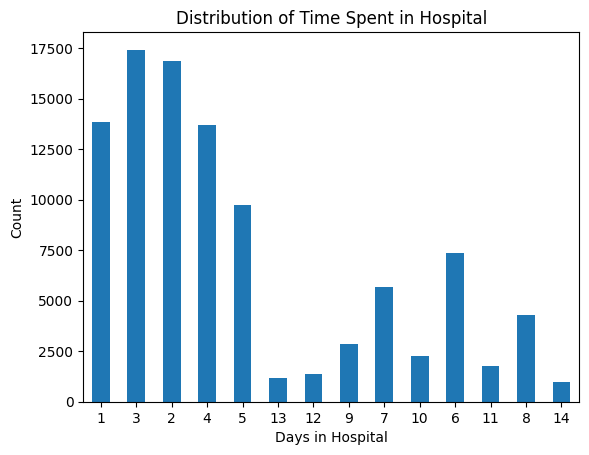

In [ ]:
import matplotlib.pyplot as plt

# Calculate value counts for the 'time_in_hospital' column, without sorting
time_in_hospital_counts = df['time_in_hospital'].value_counts(sort=False)

# Create a bar plot
time_in_hospital_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Days in Hospital')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Distribution of Time Spent in Hospital')

# Show the plot
plt.show()


In [ ]:
# Print the minimum and maximum number of laboratory tests patients have undergone in the dataset
print('The number of lab tests a patirnt has undergone can reange from', df.num_lab_procedures.min(), 'to', df.num_lab_procedures.max())

The number of lab tests a patirnt has undergone can reange from 1 to 132


In [ ]:
# list each unique value in the 'num_procedures'
df.num_procedures.value_counts()

num_procedures
0    45672
1    20247
2    12367
3     9202
6     4799
4     4048
5     2988
Name: count, dtype: int64

In [ ]:
# Print the minimum and maximum number of medications prescribed to patients in the dataset
print('The number of medications range from a minimum of', df.num_medications.min(), 'to maximum of', df.num_medications.max())

The number of medications range from a minimum of 1 to maximum of 81


In [ ]:
# Create a new column 'service_utilization' in the DataFrame by summing up the 'number_outpatient',
# 'number_emergency', and 'number_inpatient' columns
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [ ]:
# Remove the 'number_outpatient', 'number_emergency', and 'number_inpatient' columns from the DataFrame
df.drop(['number_outpatient', 'number_emergency', 'number_inpatient'], axis=1, inplace=True)

In [ ]:
df.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,service_utilization
0,Caucasian,Female,5,Not Available,Not Available,Referral,1,41,0,1,...,No,No,No,No,No,No,No,No,NO,0
1,Caucasian,Female,15,Emergency,Discharged to home,Emergency,3,59,0,18,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,AfricanAmerican,Female,25,Emergency,Discharged to home,Emergency,2,11,5,13,...,No,No,No,No,No,No,No,Yes,NO,3
3,Caucasian,Male,35,Emergency,Discharged to home,Emergency,2,44,1,16,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,Caucasian,Male,45,Emergency,Discharged to home,Emergency,1,51,0,8,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
5,Caucasian,Male,55,Emergency,Discharged to home,Referral,3,31,6,16,...,Steady,No,No,No,No,No,No,Yes,>30,0
6,Caucasian,Male,65,Elective,Discharged to home,Referral,4,70,1,21,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
7,Caucasian,Male,75,Emergency,Discharged to home,Emergency,5,73,0,12,...,No,No,No,No,No,No,No,Yes,>30,0
8,Caucasian,Female,85,Emergency,Discharged to home,Transferred from hospital,13,68,2,28,...,Steady,No,No,No,No,No,Ch,Yes,NO,0
9,Caucasian,Female,95,Elective,Transferred to another facility,Transferred from hospital,12,33,3,18,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


In [ ]:
# Count the number of each unique value in the 'max_glu_serum'
df.max_glu_serum.value_counts()

max_glu_serum
Norm    2543
>200    1416
>300    1188
Name: count, dtype: int64

In [ ]:
# Replace values in the 'max_glu_serum' column of the DataFrame according to the provided mapping
df['max_glu_serum'] = df['max_glu_serum'].replace({'>200':2,
                                                   '>300':2,
                                                   'Norm':1,
                                                   'None':0
                                                   })

In [ ]:
# Count the number of each unique value in the 'max_glu_serum' after relacing
df.max_glu_serum.value_counts()

max_glu_serum
2.0    2604
1.0    2543
Name: count, dtype: int64


# **Encoding**

**We are examining the likelihood of the patient being readmitted to the hospital within a 30-day period**

**Target content changed to 1-0**

The outcome we are looking at is whether the patient gets readmitted to the hospital within 30 days or not.

The variable actually has <30, >30 and No Readmission categories. To reduce our problem to a binary classification, we combined the readmission after 30 days and no readmission into a single category:

NO and >30: 0

<30 : 1

In [ ]:
# Outcome variable
df['readmitted'].value_counts()

readmitted
NO     52514
>30    35496
<30    11313
Name: count, dtype: int64

In [ ]:
# convert readmition to bianry class
df['readmitted'] = df['readmitted'].replace({'>30': 0, 'NO': 0, '<30': 1})

In [ ]:
# Check data after convering
df['readmitted'].value_counts()

readmitted
0    88010
1    11313
Name: count, dtype: int64

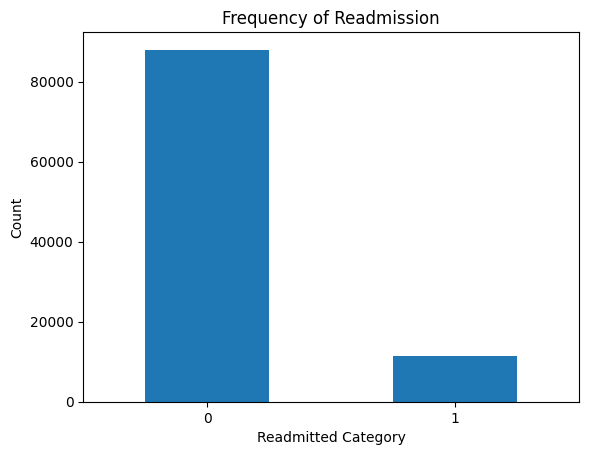

In [ ]:
import matplotlib.pyplot as plt

# Calculate value counts for the 'readmitted' column
readmitted_counts = df['readmitted'].value_counts()

# Create a bar plot
readmitted_counts.plot(kind='bar')  # You can choose any color you like

# Add labels and title
plt.xlabel('Readmitted Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.title('Frequency of Readmission')

# Show the plot
plt.show()


In [ ]:
# replace any spaces in column names with underscores to not violate this constraint
df.columns = [col.replace(" ", "_") for col in df.columns]

In [ ]:
# Count the number of each unique value in the 'A1Cresult'
df['A1Cresult'].value_counts()

A1Cresult
>8      8136
Norm    4922
>7      3773
Name: count, dtype: int64

In [ ]:
# Replace values in the 'A1Cresult' column of the DataFrame with numerical codes
# 'None' is replaced with 0, 'Norm' with 1, and both '>7' and '>8' with 2
df["A1Cresult"] = df["A1Cresult"].replace({"None":0, "Norm":1, ">7" :2, ">8":2})

In [ ]:
# Check the data after replacing
df['A1Cresult'].value_counts()

A1Cresult
2.0    11909
1.0     4922
Name: count, dtype: int64

In [ ]:
df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1})

In [ ]:
df['change'] = df['change'].replace({'No': 0, 'Ch': 1})

In [ ]:
df['change'].value_counts()

change
0    53206
1    46117
Name: count, dtype: int64

- We changed the 'medication change' feature from 'No' (no change) to 0 and 'ch' (changed) into 1

In [ ]:
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

In [ ]:
df['diabetesMed'].value_counts()

diabetesMed
1    76703
0    22620
Name: count, dtype: int64

In [ ]:
drug = list(df.iloc[:, 16:39].columns)
drug


['metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone']

In [ ]:
for i in drug:
  print(i, df[i].unique())

metformin ['No' 'Steady' 'Up' 'Down']
repaglinide ['No' 'Up' 'Steady' 'Down']
nateglinide ['No' 'Steady' 'Down' 'Up']
chlorpropamide ['No' 'Steady' 'Down' 'Up']
glimepiride ['No' 'Steady' 'Down' 'Up']
acetohexamide ['No' 'Steady']
glipizide ['No' 'Steady' 'Up' 'Down']
glyburide ['No' 'Steady' 'Up' 'Down']
tolbutamide ['No' 'Steady']
pioglitazone ['No' 'Steady' 'Up' 'Down']
rosiglitazone ['No' 'Steady' 'Up' 'Down']
acarbose ['No' 'Steady' 'Up' 'Down']
miglitol ['No' 'Steady' 'Down' 'Up']
troglitazone ['No' 'Steady']
tolazamide ['No' 'Steady' 'Up']
examide ['No']
citoglipton ['No']
insulin ['No' 'Up' 'Steady' 'Down']
glyburide-metformin ['No' 'Steady' 'Down' 'Up']
glipizide-metformin ['No' 'Steady']
glimepiride-pioglitazone ['No' 'Steady']
metformin-rosiglitazone ['No' 'Steady']
metformin-pioglitazone ['No' 'Steady']


metformin


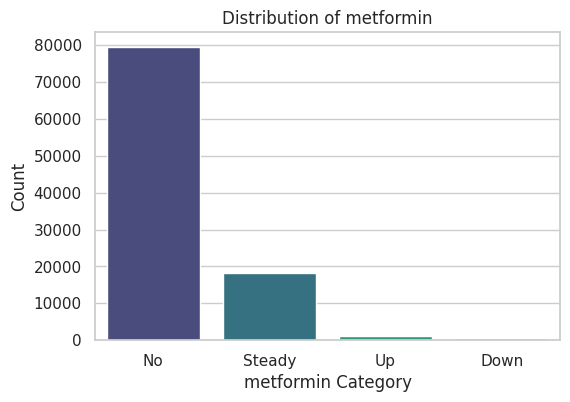

repaglinide


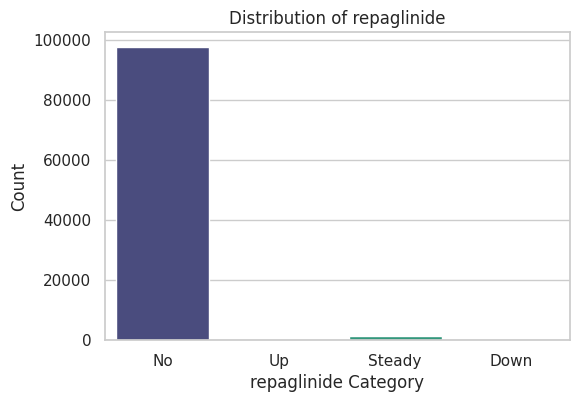

nateglinide


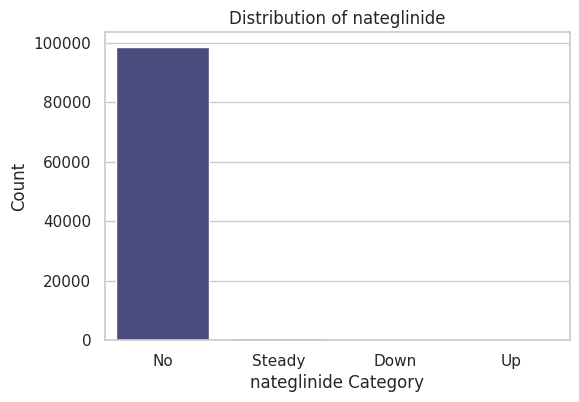

chlorpropamide


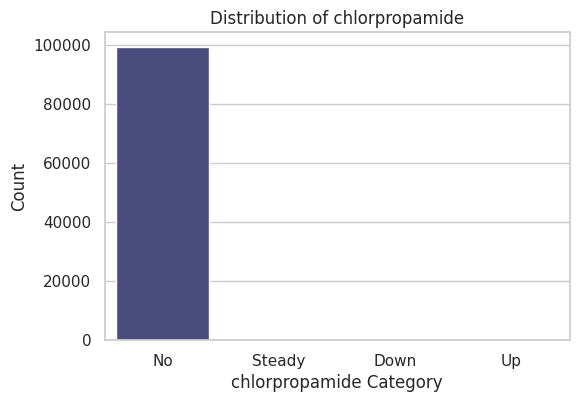

glimepiride


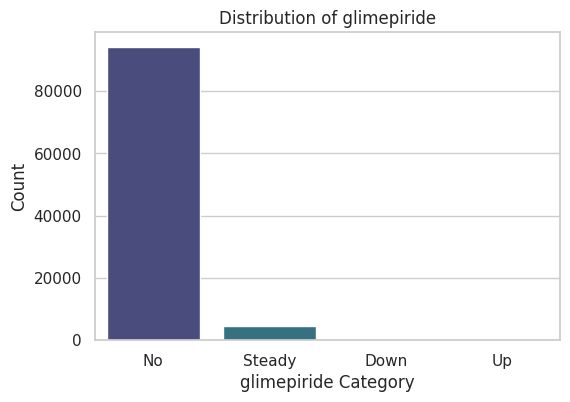

acetohexamide


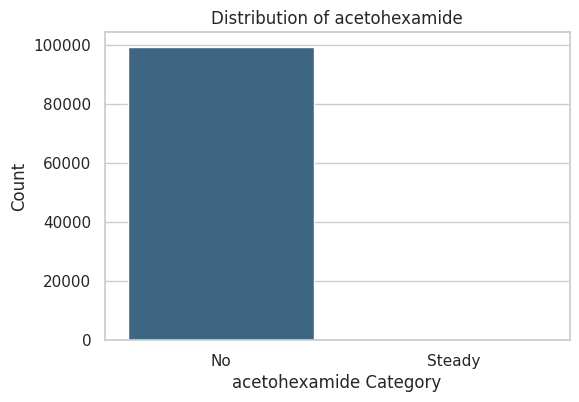

glipizide


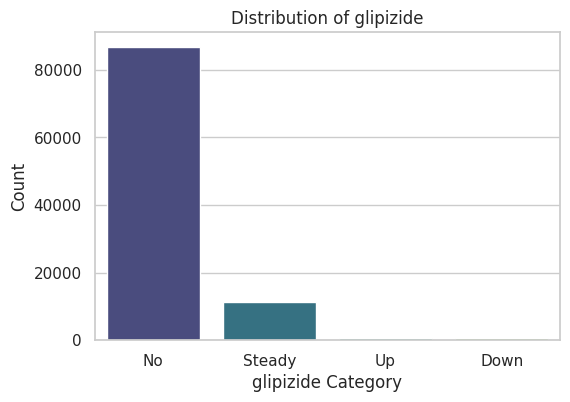

glyburide


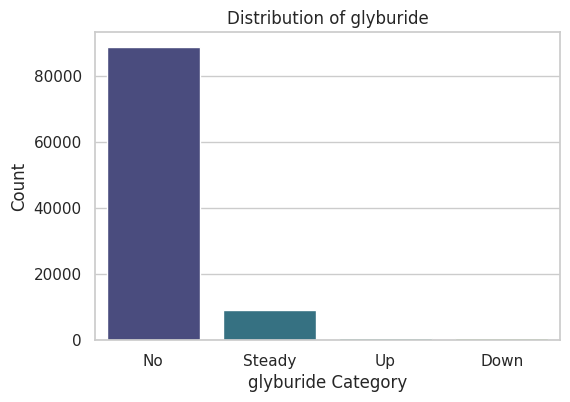

tolbutamide


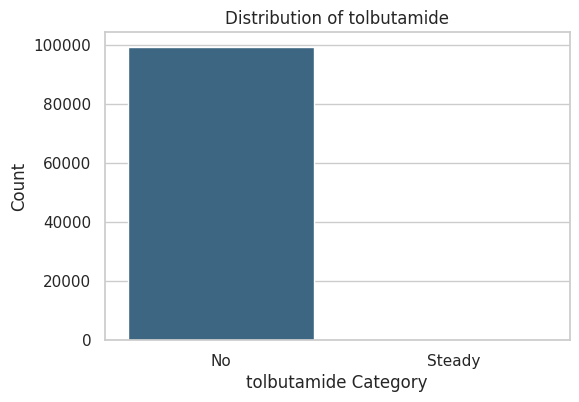

pioglitazone


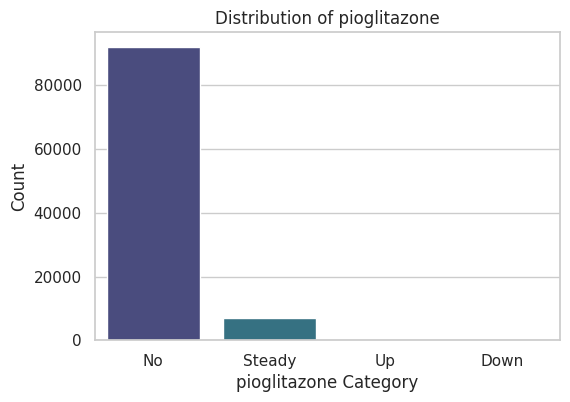

rosiglitazone


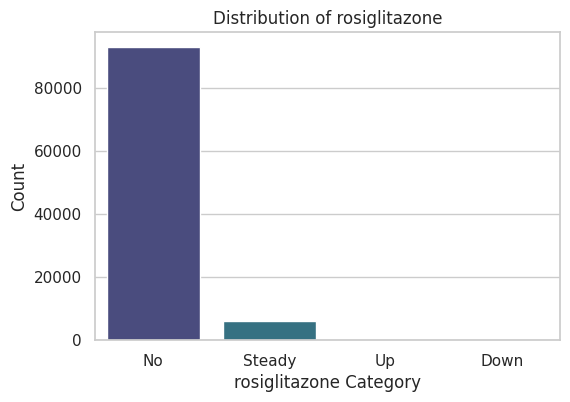

acarbose


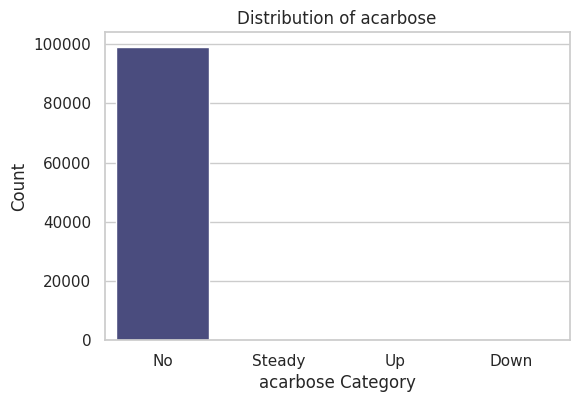

miglitol


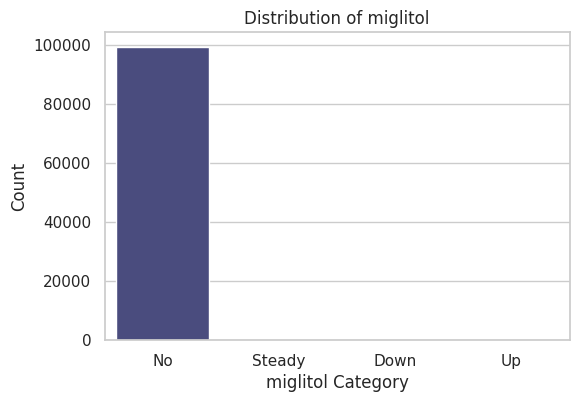

troglitazone


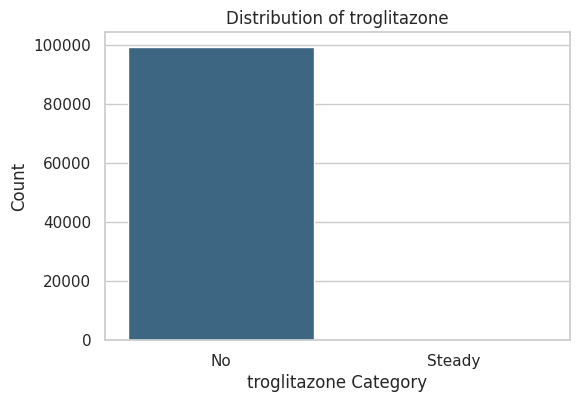

tolazamide


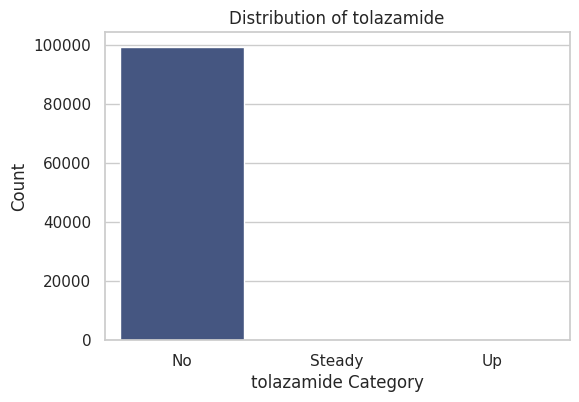

examide


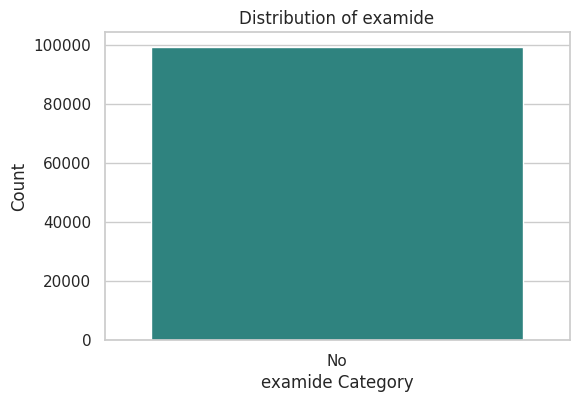

citoglipton


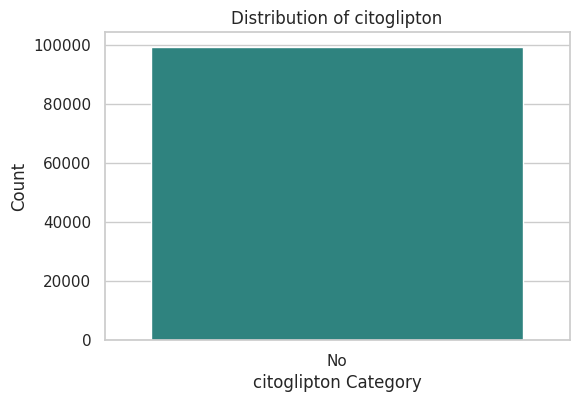

insulin


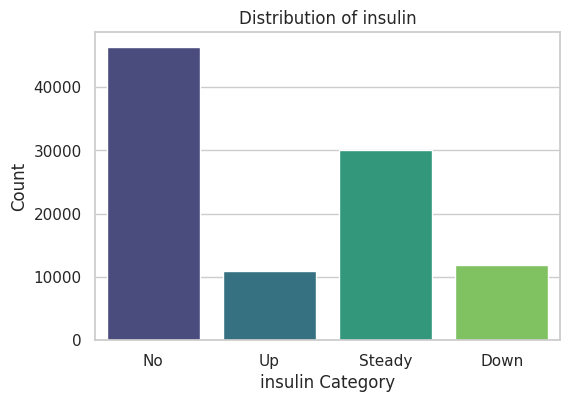

glyburide-metformin


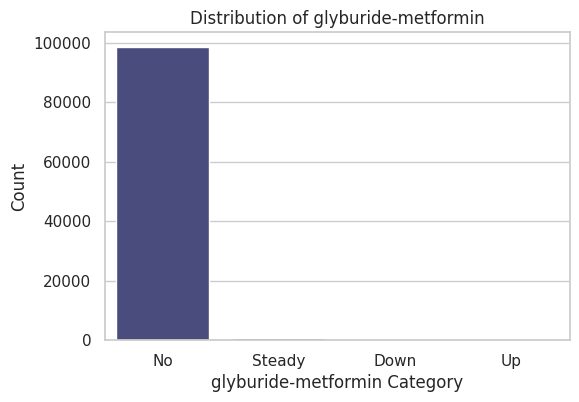

glipizide-metformin


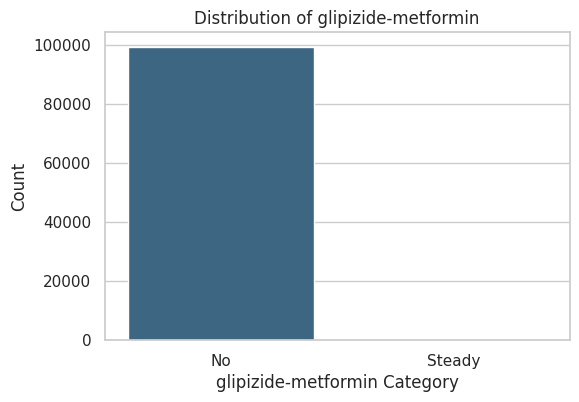

glimepiride-pioglitazone


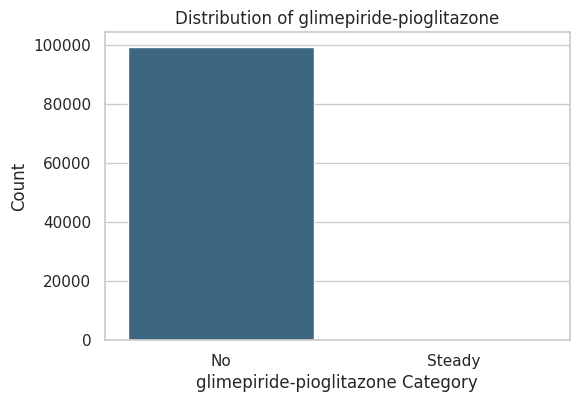

metformin-rosiglitazone


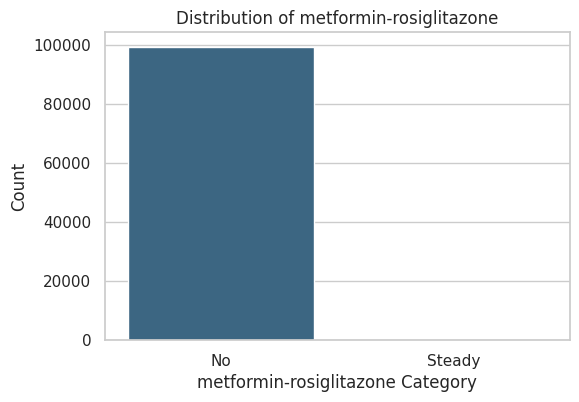

metformin-pioglitazone


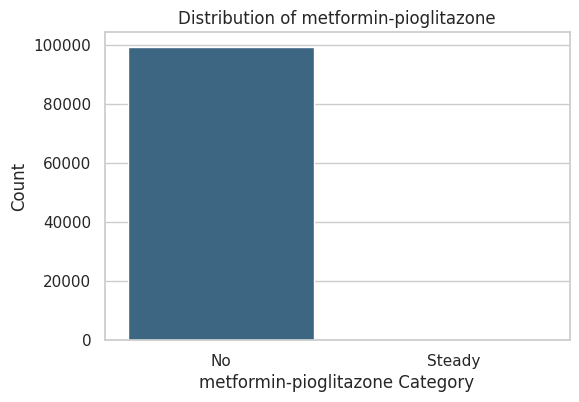

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the overall aesthetics for all plots
sns.set(style="whitegrid")

for i in drug:
    print(i)
    # Create a new figure for each plot for better clarity and layout
    plt.figure(figsize=(6, 4))  # the size of plot
    countplot = sns.countplot(x=df[i], palette="viridis")
    countplot.set_title(f'Distribution of {i}')
    countplot.set_xlabel(f'{i} Category')
    countplot.set_ylabel('Count')
    plt.xticks(rotation=0)  # Rotate the x-axis labels for better readability
    plt.show()


In [ ]:
df['citoglipton'].value_counts()

citoglipton
No    99323
Name: count, dtype: int64

In [ ]:
df = df.drop(['citoglipton', 'examide'], axis = 1)

In [ ]:
l1 = ['metformin', 'glipizide', 'insulin', 'glyburide']

metformin


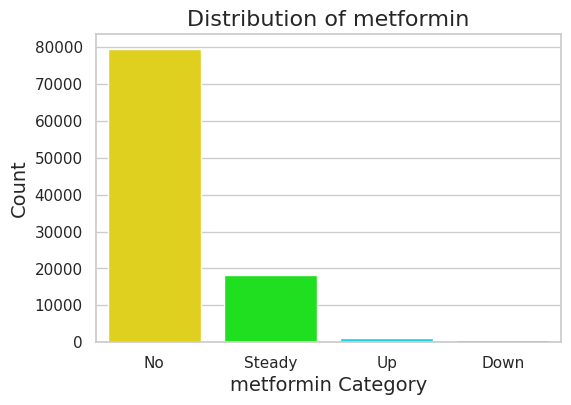

glipizide


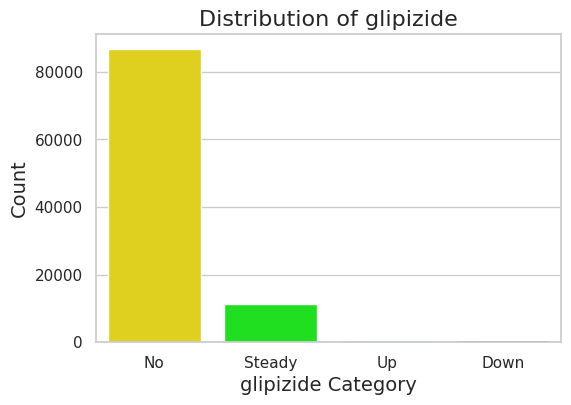

insulin


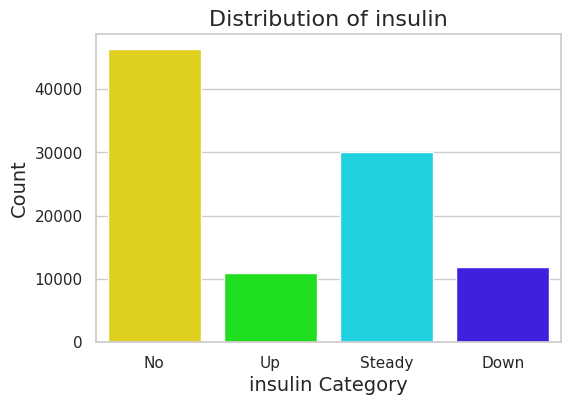

glyburide


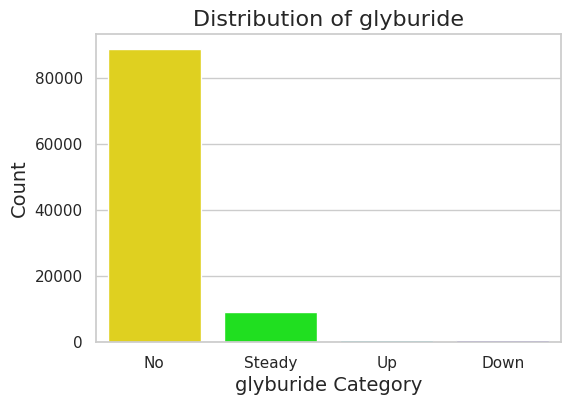

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the overall aesthetics for all plots
sns.set(style="whitegrid")

for i in l1:
    print(i)
    # Create a new figure for each plot
    plt.figure(figsize=(6, 4))
    # Create a countplot with a different color palette and add a title and axis labels
    ax = sns.countplot(x=df[i], palette="gist_rainbow")
    ax.set_title(f'Distribution of {i}', fontsize=16)
    ax.set_xlabel(f'{i} Category', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)
    plt.xticks(rotation=0)  # Rotate the x-axis labels for better readability
    plt.show()


In [ ]:
  # Calculate and print the percentage distribution of values in the current column
for i in l1:
  print(i)
  print((df[i].value_counts(normalize=True)*100))

metformin
metformin
No        80.021747
Steady    18.330095
Up         1.070246
Down       0.577912
Name: proportion, dtype: float64
glipizide
glipizide
No        87.385601
Steady    11.293457
Up         0.769208
Down       0.551735
Name: proportion, dtype: float64
insulin
insulin
No        46.685058
Steady    30.265900
Down      11.989167
Up        11.059875
Name: proportion, dtype: float64
glyburide
glyburide
No        89.407287
Steady     9.222436
Up         0.806460
Down       0.563817
Name: proportion, dtype: float64


In [ ]:
# This loop iterates through a list of column names stored in l1 and applies
# a transformation to each of these columns in the DataFrame
for i in l1:
  df[i] = df[i].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

In [ ]:
df.insulin.value_counts()

insulin
0    76430
1    22893
Name: count, dtype: int64

In [ ]:
# drop rest of the medication columns
columns_to_drop = ['repaglinide', 'nateglinide', 'chlorpropamide', 'acetohexamide',
                   'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                   'miglitol', 'troglitazone', 'tolazamide', 'gluburide-metformin',
                   'glipizide-metformin', 'glipizide-pioglitazone',
                   'metformin-rosiglitazone', 'metformin-pioglitazone']

# Drop columns that exist in the DataFrame
df = df.drop([col for col in columns_to_drop if col in df.columns], axis=1)

In [ ]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glimepiride,glipizide,glyburide,insulin,glyburide-metformin,glimepiride-pioglitazone,change,diabetesMed,readmitted,service_utilization
0,Caucasian,0,5,Not Available,Not Available,Referral,1,41,0,1,...,No,0,0,0,No,No,0,0,0,0
1,Caucasian,0,15,Emergency,Discharged to home,Emergency,3,59,0,18,...,No,0,0,1,No,No,1,1,0,0
2,AfricanAmerican,0,25,Emergency,Discharged to home,Emergency,2,11,5,13,...,No,0,0,0,No,No,0,1,0,3
3,Caucasian,1,35,Emergency,Discharged to home,Emergency,2,44,1,16,...,No,0,0,1,No,No,1,1,0,0
4,Caucasian,1,45,Emergency,Discharged to home,Emergency,1,51,0,8,...,No,0,0,0,No,No,1,1,0,0


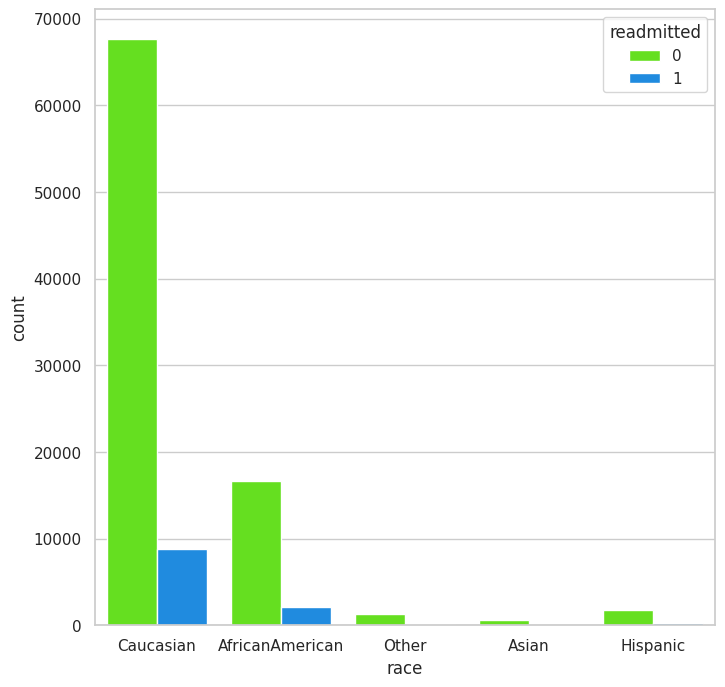

In [ ]:
# readmission by race
fig = plt.figure(figsize=(8,8))
sns.countplot(x=df['race'], hue=df['readmitted'], palette="gist_rainbow")
plt.show()  # display the plot


In [ ]:
#  convert the 'race' column from the DataFrame df into dummy (or indicator) variables:
race_dummies = pd.get_dummies(df['race'], drop_first=True)
race_dummies.head()

,Asian,Caucasian,Hispanic,Other
0,False,True,False,False
1,False,True,False,False
2,False,False,False,False
3,False,True,False,False
4,False,True,False,False


In [ ]:
# combines the original DataFrame df with the race_dummies DataFrame:
df = pd.concat([df, race_dummies], axis=1)

# Check if 'race' column exists before trying to drop it
if 'race' in df.columns:
    df.drop(['race'], inplace=True, axis=1)

df.head()


,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,...,glyburide-metformin,glimepiride-pioglitazone,change,diabetesMed,readmitted,service_utilization,Asian,Caucasian,Hispanic,Other
0,0,5,Not Available,Not Available,Referral,1,41,0,1,250.83,...,No,No,0,0,0,0,False,True,False,False
1,0,15,Emergency,Discharged to home,Emergency,3,59,0,18,276,...,No,No,1,1,0,0,False,True,False,False
2,0,25,Emergency,Discharged to home,Emergency,2,11,5,13,648,...,No,No,0,1,0,3,False,False,False,False
3,1,35,Emergency,Discharged to home,Emergency,2,44,1,16,8,...,No,No,1,1,0,0,False,True,False,False
4,1,45,Emergency,Discharged to home,Emergency,1,51,0,8,197,...,No,No,1,1,0,0,False,True,False,False


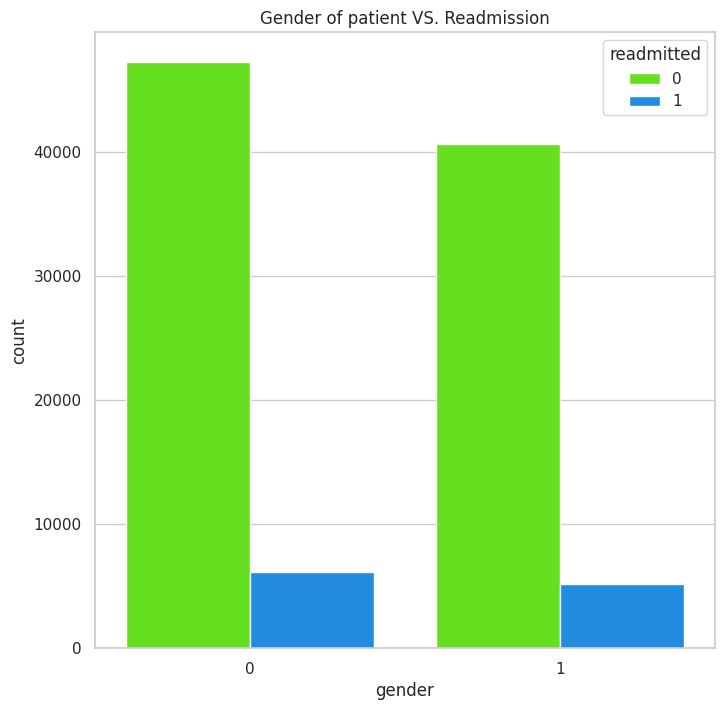

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = sns.countplot(x='gender', hue='readmitted', data=df, palette="gist_rainbow")
ax.set_title("Gender of patient VS. Readmission")  # Set the title for the plot
plt.show()  # Display the plot

<Figure size 400x200 with 0 Axes>

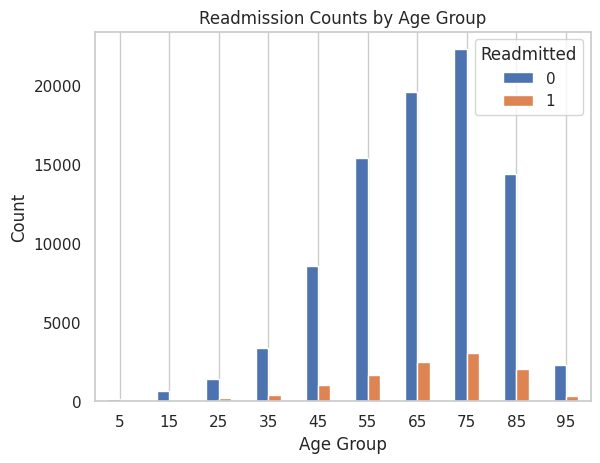

In [ ]:
#  compare frequencies or another metric across categories like 'age'.
age_group_readmission = df.groupby('age')['readmitted'].value_counts().unstack()

# Plotting
plt.figure(figsize=(4, 2))
age_group_readmission.plot(kind='bar')
plt.title("Readmission Counts by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title='Readmitted')
plt.grid(axis='y')
plt.show()

In [ ]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Print the numerical columns
print(numerical_df)

        gender  age  time_in_hospital  num_lab_procedures  num_procedures  \
0            0    5                 1                  41               0   
1            0   15                 3                  59               0   
2            0   25                 2                  11               5   
3            1   35                 2                  44               1   
4            1   45                 1                  51               0   
...        ...  ...               ...                 ...             ...   
101761       1   75                 3                  51               0   
101762       0   85                 5                  33               3   
101763       1   75                 1                  53               0   
101764       0   85                10                  45               2   
101765       1   75                 6                  13               3   

        num_medications  number_diagnoses  max_glu_serum  A1Cresult  \
0   

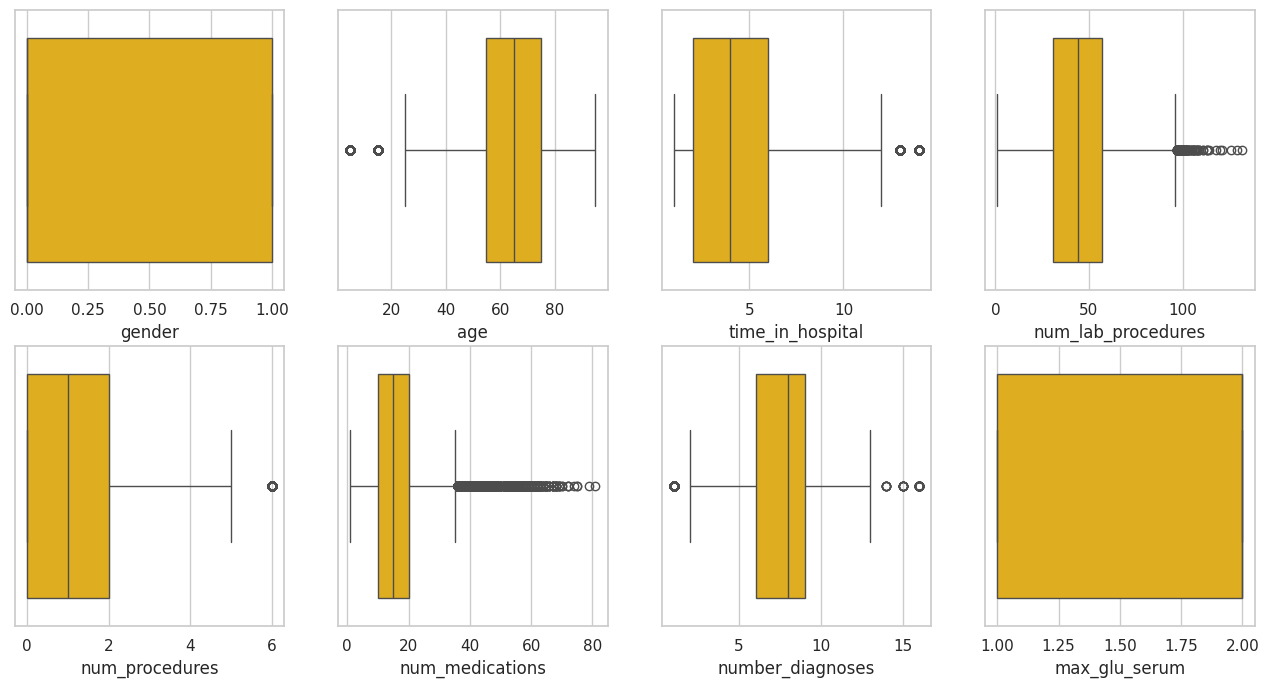

In [ ]:
# Automatically select numerical columns from df
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

def boxplot_for_outlier(df, columns):
    count = 0
    nrows = 2
    ncols = 4
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16,8))
    for i in range(nrows):
        for j in range(ncols):
            if count < len(columns):  # Check if there are still columns to plot
                sns.boxplot(x=df[columns[count]], palette="Wistia", ax=ax[i][j])
                count += 1

boxplot_for_outlier(df, numerical_columns)


**Gender Distribution**

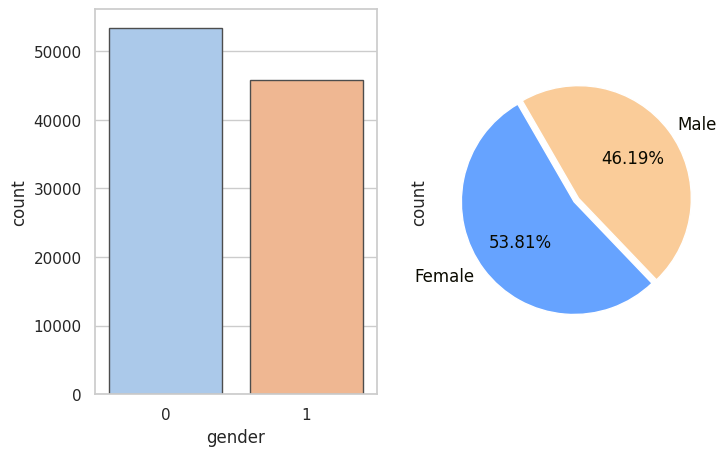

In [ ]:
fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(8,5))
labels=['Female','Male']
sns.countplot(x=df.gender, data=df, palette="pastel",ax=ax[0], edgecolor=".3")
df.gender.value_counts().plot.pie(autopct="%1.2f%%", ax=ax[1], colors=['#66a3ff','#facc99'],
                                        labels=labels, explode = (0, 0.05), startangle=120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

Target content changed to 1-0

The outcome we are looking at is whether the patient gets readmitted to the hospital within 30 days or not.

The variable actually has <30, >30 and No Readmission categories. To reduce our problem to a binary classification, we combined the readmission after 30 days and no readmission into a single category:

NO and >30: 0

<30 : 1

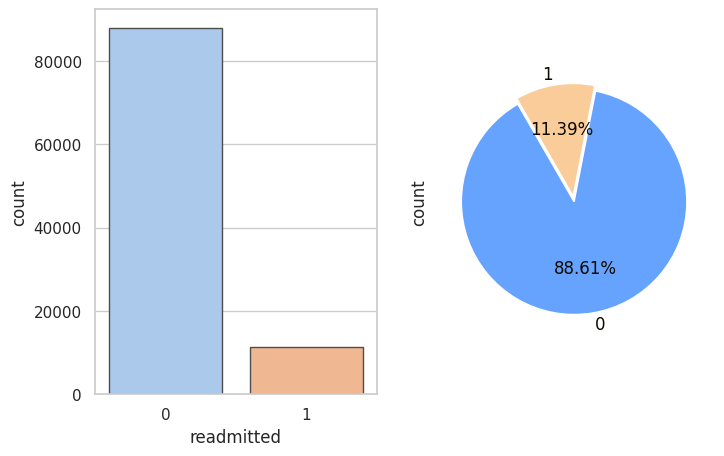

In [ ]:
import seaborn as sns

fig, ax =plt.subplots(nrows=1,ncols=2, figsize=(8,5))
labels=['0','1']
sns.countplot(x = df.readmitted, data=df, palette="pastel",ax = ax[0], edgecolor = ".3")
df.readmitted.value_counts().plot.pie(autopct= "%1.2f%%", ax = ax[1], colors=['#66a3ff','#facc99'],
                                        labels = labels, explode = (0, 0.05), startangle = 120,
                                        textprops={'fontsize': 12, 'color':'#0a0a00'})
plt.show()

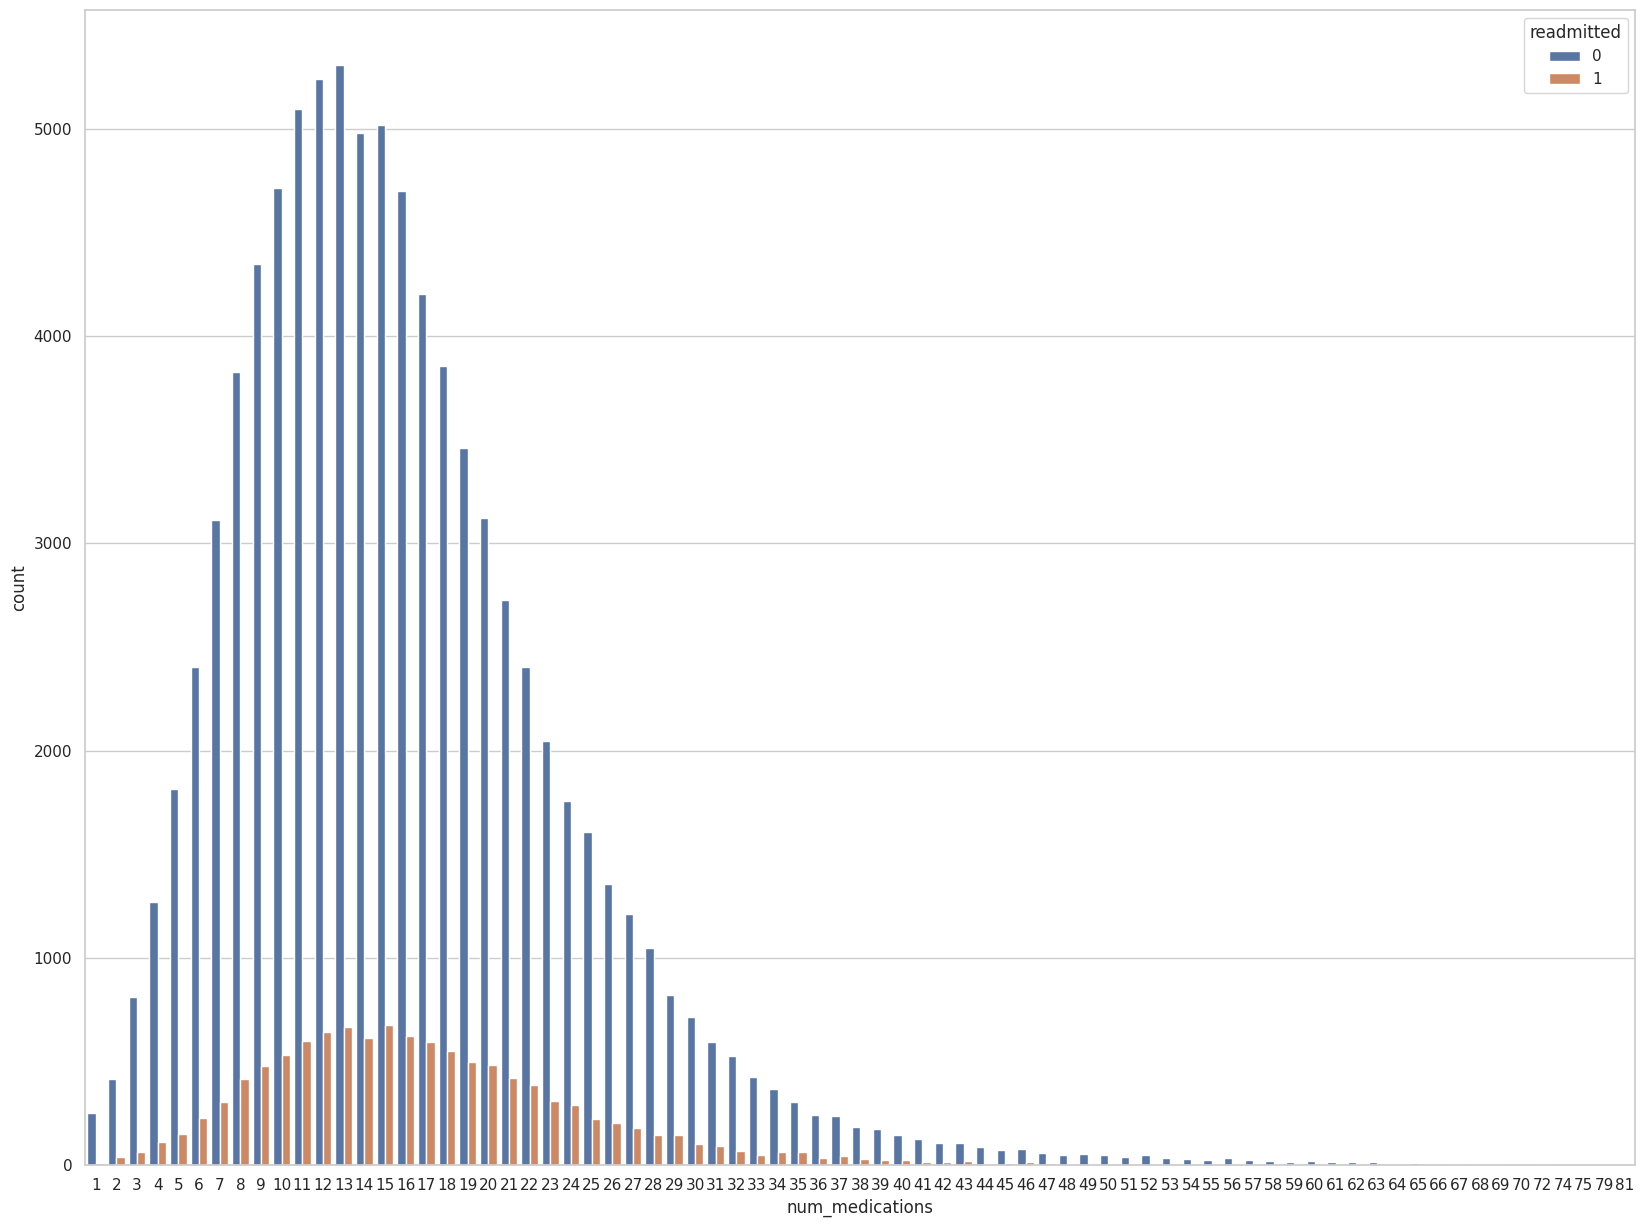

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(x='num_medications', hue='readmitted', data=df)
plt.show()


#**Train-Test and validate Splitting**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# df' is our DataFrame
X = df.drop('readmitted', axis=1)  # removes the target column from the features
y = df['readmitted']  # This sets 'target' column as the target dataset

# Then, use our existing code to split the datasets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, random_state=1)

# Print the shapes of the splits to verify the sizes
print('Training set:', X_train.shape, y_train.shape)
print('Validation set:', X_val.shape, y_val.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (48668, 29) (48668,)
Validation set: (20858, 29) (20858,)
Test set: (29797, 29) (29797,)


In [ ]:
import re
# Replace anything that is not a letter, number, or underscore
df.columns = [re.sub(r'\W+', '_', col) for col in df.columns]

In [ ]:
import re

# Check if all column names contain only letters, numbers, or underscores
valid = all(re.match(r'^\w+$', col) for col in df.columns)
print("All column names are valid:", valid)


All column names are valid: True


**applying imputation**

In [ ]:
from sklearn.impute import SimpleImputer

# Identify numerical and categorical columns again
numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Imputers for numerical and categorical data
imputer_num = SimpleImputer(strategy='median')  # For numerical columns
imputer_cat = SimpleImputer(strategy='most_frequent')  # For categorical columns

# Apply imputation
df[numerical_columns] = imputer_num.fit_transform(df[numerical_columns])
df[categorical_columns] = imputer_cat.fit_transform(df[categorical_columns])

# Confirm imputation
print("Missing values after imputation:", df.isnull().sum().sum())


Missing values after imputation: 0


**Apply One-Hot Encoding**

In [ ]:
# Apply One-Hot Encoding
X = pd.get_dummies(df.drop(['readmitted'], axis=1), columns=categorical_columns)
y = df['readmitted']

# Split the data again into training, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, random_state=1)


**Handing Class Imbalance**

In [ ]:
#  Handing Class Imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


**Replace whitespaces**

In [ ]:
# Replace whitespaces in column names
X_train.columns = [col.replace(' ', '_') for col in X_train.columns]
X_val.columns = [col.replace(' ', '_') for col in X_val.columns]
X_test.columns = [col.replace(' ', '_') for col in X_test.columns]

In [ ]:
# Print the counts of each class
print(y.value_counts())

# Print the percentage of each class
print(y.value_counts(normalize=True) * 100)


readmitted
0.0    88010
1.0    11313
Name: count, dtype: int64
readmitted
0.0    88.609889
1.0    11.390111
Name: proportion, dtype: float64


#**Modelling**

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define base models for stacking with optimizations
base_models = [
    ('dt', DecisionTreeClassifier(max_depth=40, random_state=1)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=1)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100, random_state=1, n_jobs=-1)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=30, random_state=1, n_jobs=-1)),
    ('lgbm', LGBMClassifier(n_estimators=100, random_state=1, n_jobs=-1)),
    ('lr', LogisticRegression(max_iter=500, random_state=1)),
    ('nn', MLPClassifier(max_iter=100, random_state=1))
]

# DataFrame to store results
results_df = pd.DataFrame(columns=['Model', 'Set', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])

# Train and evaluate each base model
for name, model in base_models:
    model.fit(X_train, y_train)
    phases = {
        'Train': (X_train, y_train),
        'Validation': (X_val, y_val),
        'Test': (X_test, y_test)
    }

    for phase, (X, y) in phases.items():
        y_pred = model.predict(X)
        accuracy = accuracy_score(y, y_pred)
        recall = recall_score(y, y_pred, average='macro')
        precision = precision_score(y, y_pred, average='macro')
        f1 = f1_score(y, y_pred, average='macro')
        results_df = pd.concat([results_df, pd.DataFrame({
            'Model': [name],
            'Set': [phase],
            'Accuracy': [f"{accuracy:.2f}"],
            'Recall': [f"{recall:.2f}"],
            'Precision': [f"{precision:.2f}"],
            'F1 Score': [f"{f1:.2f}"]
        })], ignore_index=True)

# Define the stacking ensemble with a different final estimator and non-parallel execution
final_estimator = GradientBoostingClassifier(random_state=42)
stack_model = StackingClassifier(
    estimators=base_models, final_estimator=final_estimator, cv=5, n_jobs=1  # Non-parallel execution
)

# Train the stacking ensemble on SMOTE data
stack_model.fit(X_train, y_train)
for phase, (X, y) in phases.items():
    y_pred = stack_model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred, average='macro')
    precision = precision_score(y, y_pred, average='macro')
    f1 = f1_score(y, y_pred, average='macro')
    results_df = pd.concat([results_df, pd.DataFrame({
        'Model': ['Stacking Ensemble'],
        'Set': [phase],
        'Accuracy': [f"{accuracy:.2f}"],
        'Recall': [f"{recall:.2f}"],
        'Precision': [f"{precision:.2f}"],
        'F1 Score': [f"{f1:.2f}"]
    })], ignore_index=True)

# Display the results
print(results_df)

[LightGBM] [Info] Number of positive: 5549, number of negative: 43119
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1644
[LightGBM] [Info] Number of data points in the train set: 48668, number of used features: 697
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.114017 -> initscore=-2.050346
[LightGBM] [Info] Start training from score -2.050346
[LightGBM] [Info] Number of positive: 5549, number of negative: 43119
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1644
[LightGBM] [Info] Number of data points in the train set: 48668, number of used features: 697
[LightGBM] [Info] 

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hyperparameters Tuning
models_params = {
    DecisionTreeClassifier: {'max_depth': [10, 15, 20, 30], 'min_samples_split': [2, 5, 10]},
    RandomForestClassifier: {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30], 'min_samples_leaf': [1, 2, 4]},
    GradientBoostingClassifier: {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.2]},
    XGBClassifier: {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    LGBMClassifier: {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.2]},
    LogisticRegression: {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']},
    MLPClassifier: {'alpha': [0.0001, 0.001, 0.01], 'learning_rate_init': [0.001, 0.01]}
}

cv_folds = 5 # Corss validation with 5 folds
results = []

# Redefine datasets for broader scope
datasets = {
    'Train': (X_train, y_train),
    'Validation': (X_val, y_val),
    'Test': (X_test, y_test)
}

# Function to train and evaluate models
def tune_and_evaluate(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=cv_folds, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    for phase, (X, y) in datasets.items():
        y_pred = best_model.predict(X)
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred, average='macro')
        recall = recall_score(y, y_pred, average='macro')
        f1 = f1_score(y, y_pred, average='macro')
        results.append({
            'Model': model.__class__.__name__,
            'Phase': phase,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

    return best_model

# Evaluate each model
for model_cls, params in models_params.items():
    model = model_cls(random_state=1)
    tuned_model = tune_and_evaluate(model, params)

# Define and evaluate the final stacking ensemble
meta_learner = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=1)
final_stack = StackingClassifier(estimators=[(cls.__name__, cls()) for cls in models_params], final_estimator=meta_learner, cv=cv_folds, n_jobs=-1)
final_stack.fit(X_train, y_train)

for phase, (X, y) in datasets.items():
    y_pred = final_stack.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='macro')
    recall = recall_score(y, y_pred, average='macro')
    f1 = f1_score(y, y_pred, average='macro')
    results.append({
            'Model': model_cls.__name__,
            'Set': set_name,
            'Accuracy': f"{accuracy_score(y, y_pred):.2f}",
            'Precision': f"{precision_score(y, y_pred, average='macro'):.2f}",
            'Recall': f"{recall_score(y, y_pred, average='macro'):.2f}",
            'F1 Score': f"{f1_score(y, y_pred, average='macro'):.2f}"
        })

# Output results in DataFrame format
results_df = pd.DataFrame(results)
print(results_df)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
[LightGBM] [Info] Number of positive: 2416, number of negative: 18441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1142
[LightGBM] [Info] Number of data points in the train set: 20857, number of used features: 455
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.115836 -> initscore=-2.032463
[LightGBM] [Info] Start training from score -2.032463
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
                 